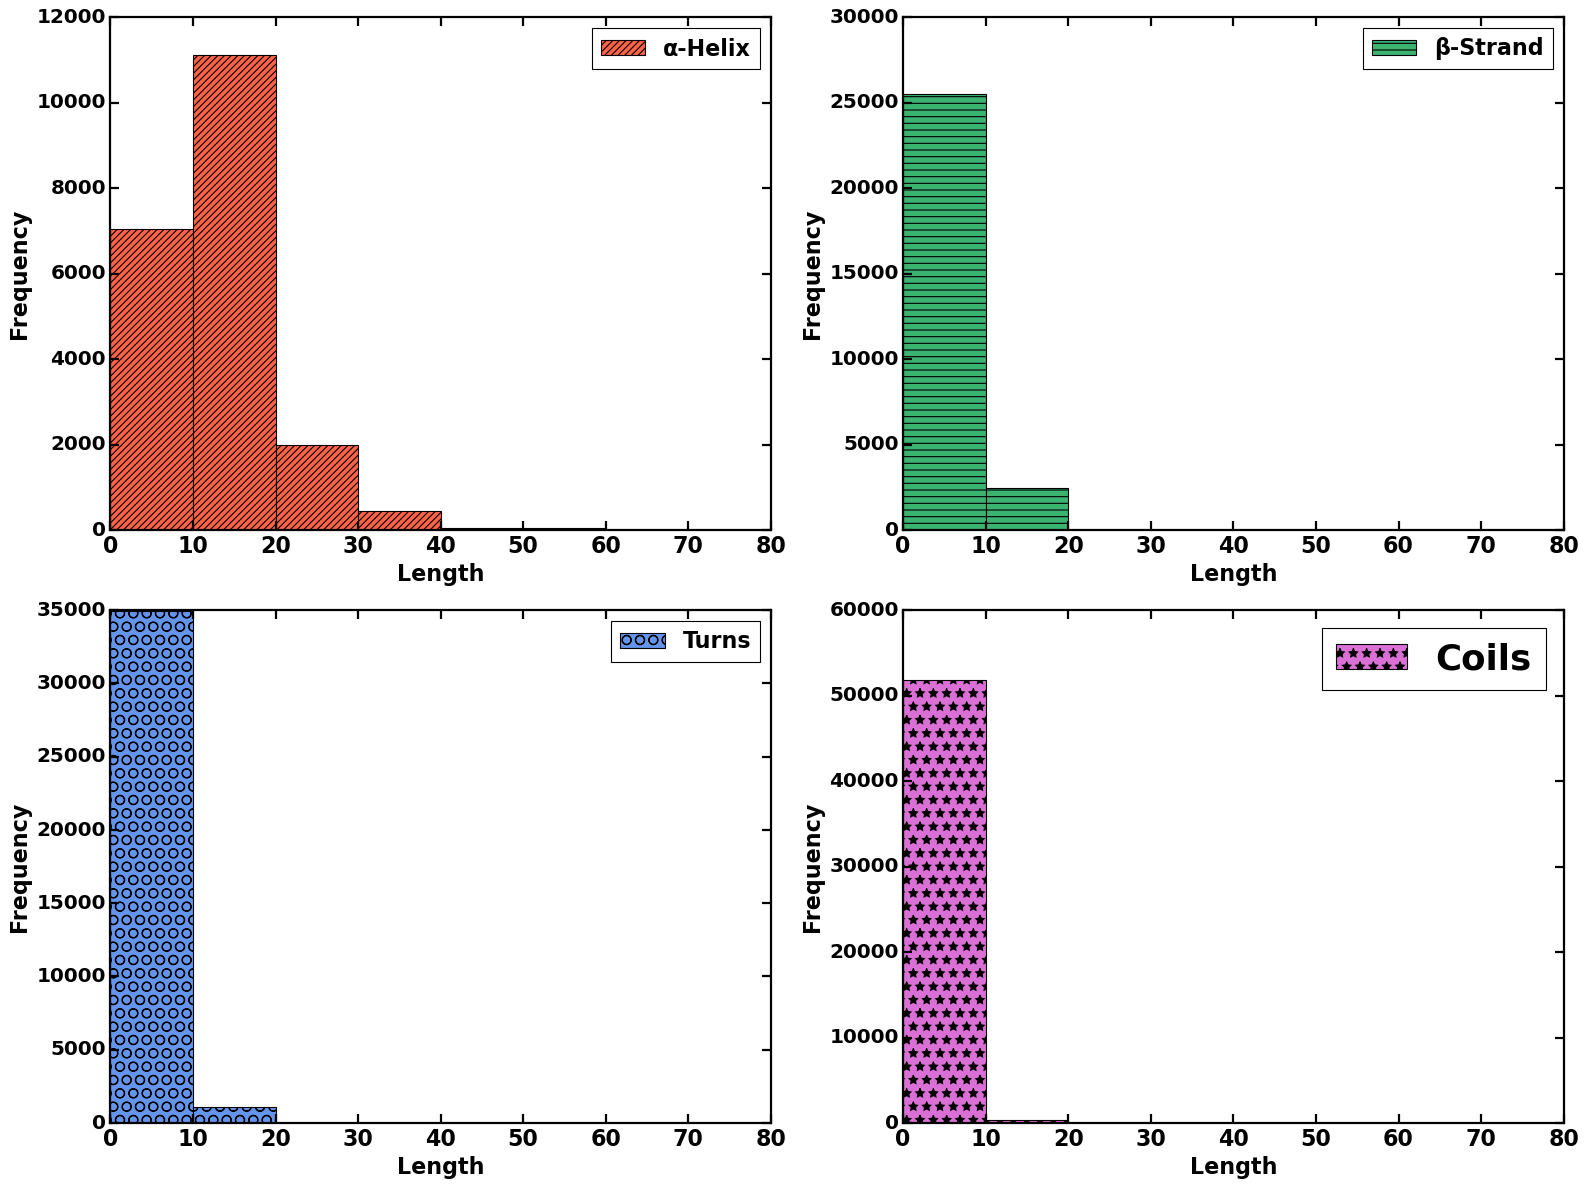

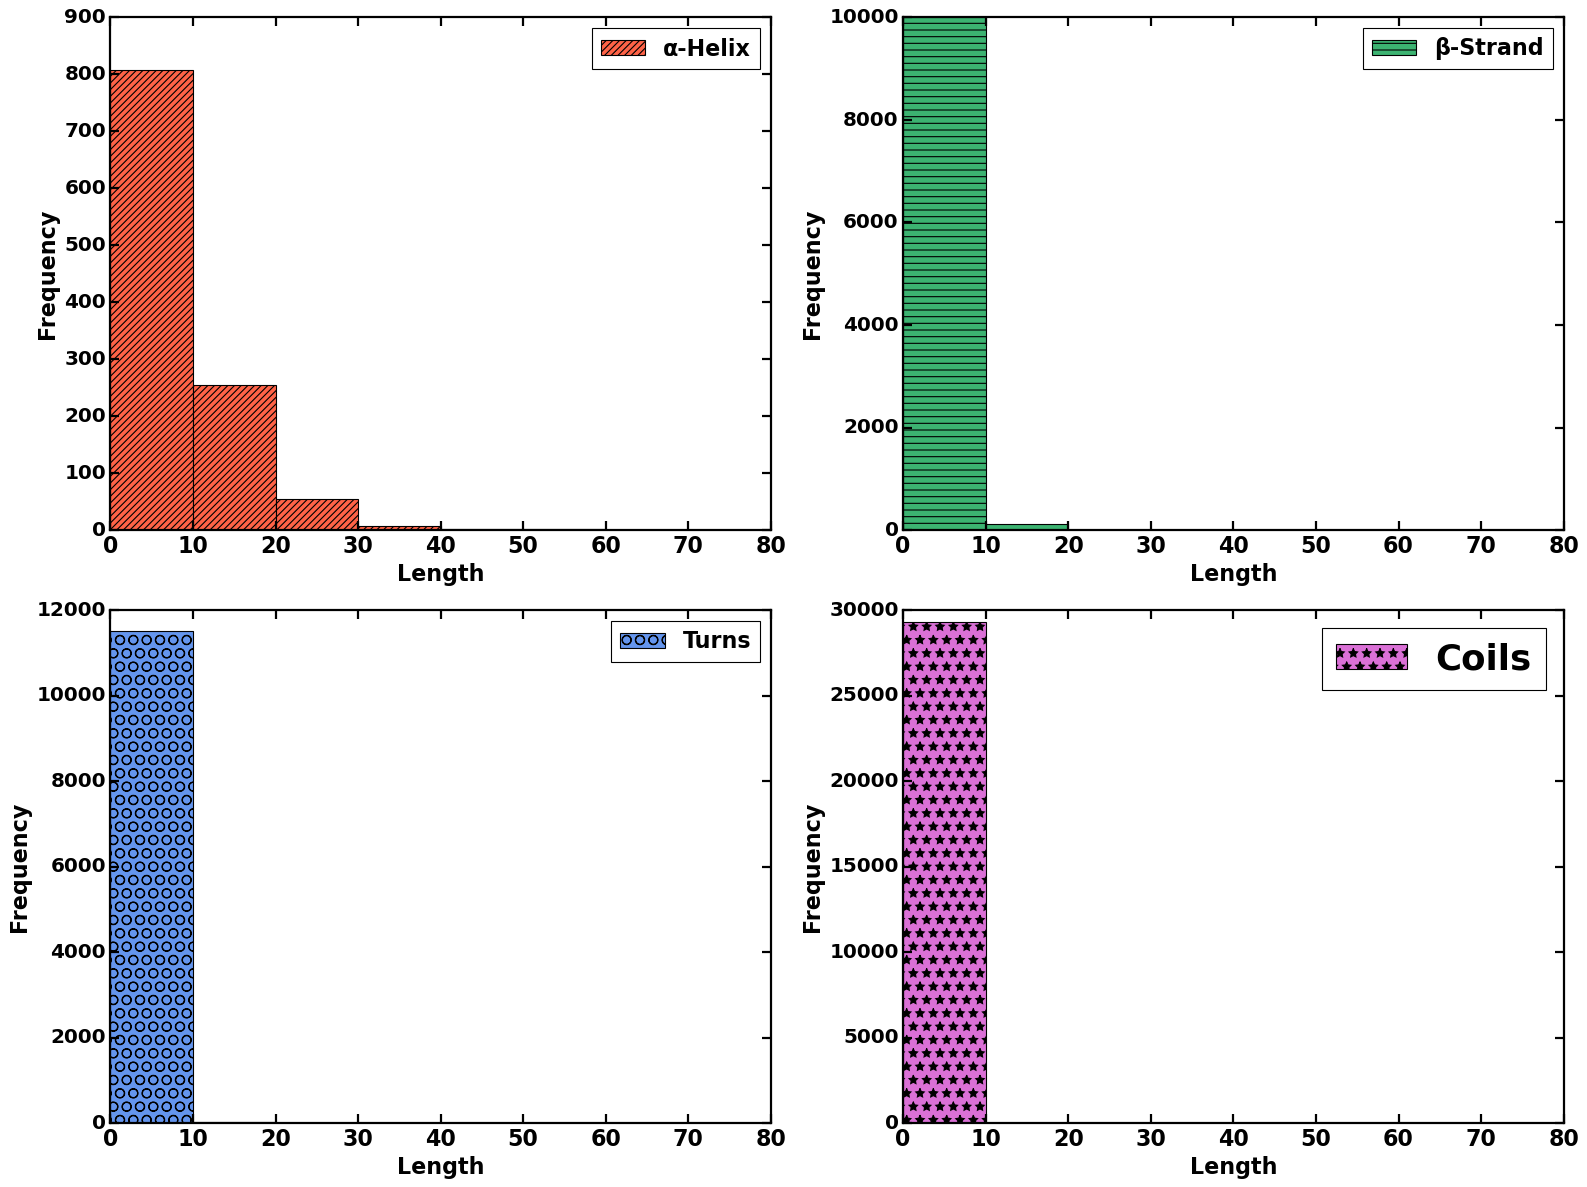

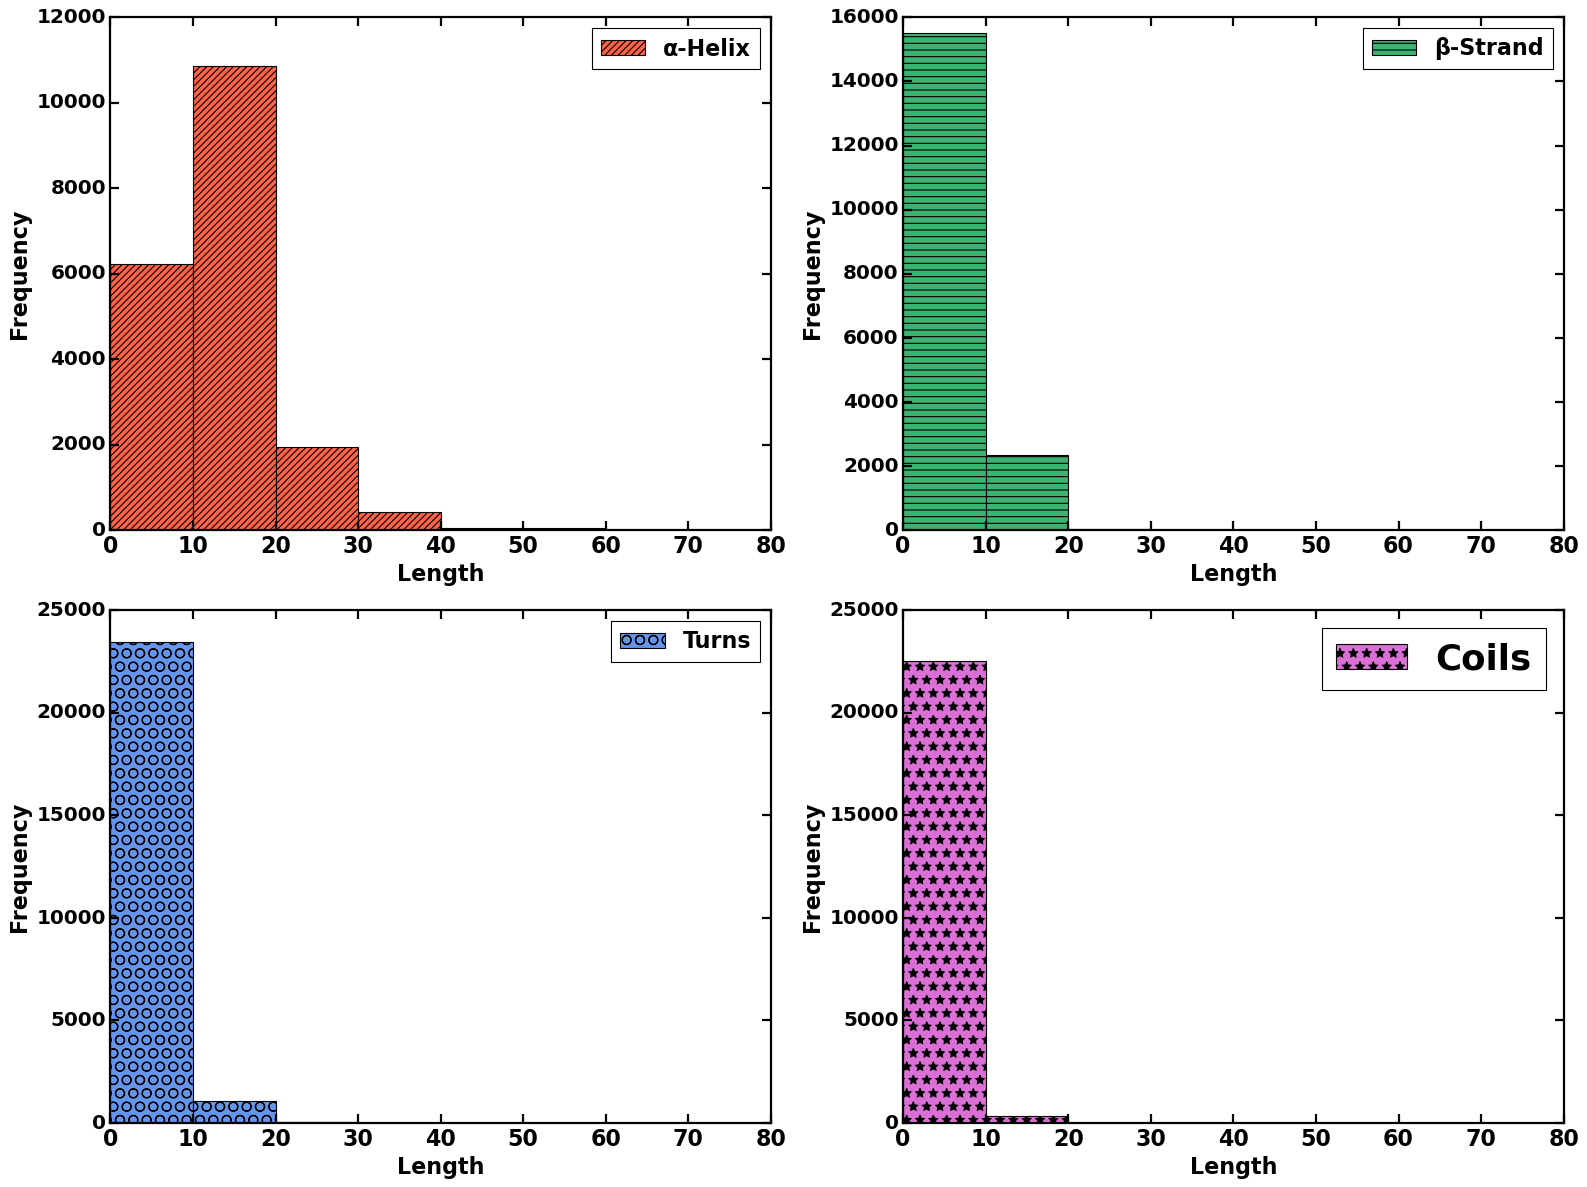

In [1]:
##Plotting length wise distribution
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#matplotlib.use('pdf')
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
from operator import add,sub
from operator import add,sub
plt.style.use('classic')
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth']= 2
##
statements=["all","E0","G0"]
for statement in statements:
    ##*****NAMES and SELECTION BELOW
    a=["helix","betasheet", "turns", "coil"]
    ######
    col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
               'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']
    length_dict={}
    
    for sec_st in a:
        filename="../all_"+sec_st+".csv"
        df=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
        #data= df.loc[(df['Length'] > initial) & (df['Length'] < final)]
        if statement=="E0":
            df=df.loc[df['FrCharged'] == 0]
            #suptitle="Length distribution in Secondary Structures with no Charged residues"
            figure="LengthE0"
        elif statement=="G0":
            df=df.loc[df['FrCharged'] > 0]
            #suptitle="Length distribution in Secondary Structures with atleast one Charged residues"
            figure="LengthG0"
        elif statement=="all":
            df=df
            #suptitle="Length distribution in different Secondary Structures"
            figure="Length-All"
        names=df.loc[:,'Name']
        lengths=df['Length'].tolist()
        length_dict[sec_st]=lengths
    plt.figure(figsize=(20,15),facecolor='white')
    #plt.suptitle(suptitle,fontsize = 20, fontweight='bold')
    plt.subplot(2,2,1)
    plt.hist(length_dict['helix'], bins=np.arange(0,90,10), color="tomato", label="α-Helix", hatch= "////")
    plt.xlabel("Length",fontsize = 20, fontweight="bold")
    plt.ylabel("Frequency",fontsize = 20, fontweight="bold")
    plt.xticks(np.arange(0,90,10),fontsize = 20, fontweight='bold')
    plt.yticks(fontsize = 18, fontweight='bold')
    plt.legend(numpoints = 1,prop=dict(weight='bold',size=20),loc='best')
    plt.subplot(2,2,2)
    plt.hist(length_dict['betasheet'], bins=np.arange(0,90,10), color="mediumseagreen", label="β-Strand", hatch= "--")
    plt.xlabel("Length",fontsize = 20, fontweight="bold")
    plt.ylabel("Frequency",fontsize = 20, fontweight="bold")
    plt.xticks(np.arange(0,90,10),fontsize = 20, fontweight='bold')
    plt.yticks(fontsize = 18, fontweight='bold')
    plt.legend(numpoints = 1,prop=dict(weight='bold',size=20),loc='best')
    plt.subplot(2,2,3)
    plt.hist(length_dict['turns'], bins=np.arange(0,90,10), color="cornflowerblue",  label="Turns", hatch= "O")
    plt.xlabel("Length",fontsize = 20, fontweight="bold")
    plt.ylabel("Frequency",fontsize = 20, fontweight="bold")
    plt.xticks(np.arange(0,90,10),fontsize = 20, fontweight='bold')
    plt.yticks(fontsize = 18, fontweight='bold')
    plt.legend(numpoints = 1,prop=dict(weight='bold',size=20),loc='best')
    plt.subplot(2,2,4)
    plt.hist(length_dict['coil'], bins=np.arange(0,90,10), color="orchid", label="Coils", hatch= "*")
    plt.xlabel("Length",fontsize = 20, fontweight="bold")
    plt.ylabel("Frequency",fontsize = 20, fontweight="bold")
    plt.xticks(np.arange(0,90,10),fontsize = 20, fontweight='bold')
    plt.yticks(fontsize = 18, fontweight='bold')
    plt.legend(numpoints = 1, prop=dict(weight='bold',size=32),loc='best')
    plt.tight_layout()
    plt.savefig(figure+".png", dpi=300, bbox_inches='tight')
plt.show()

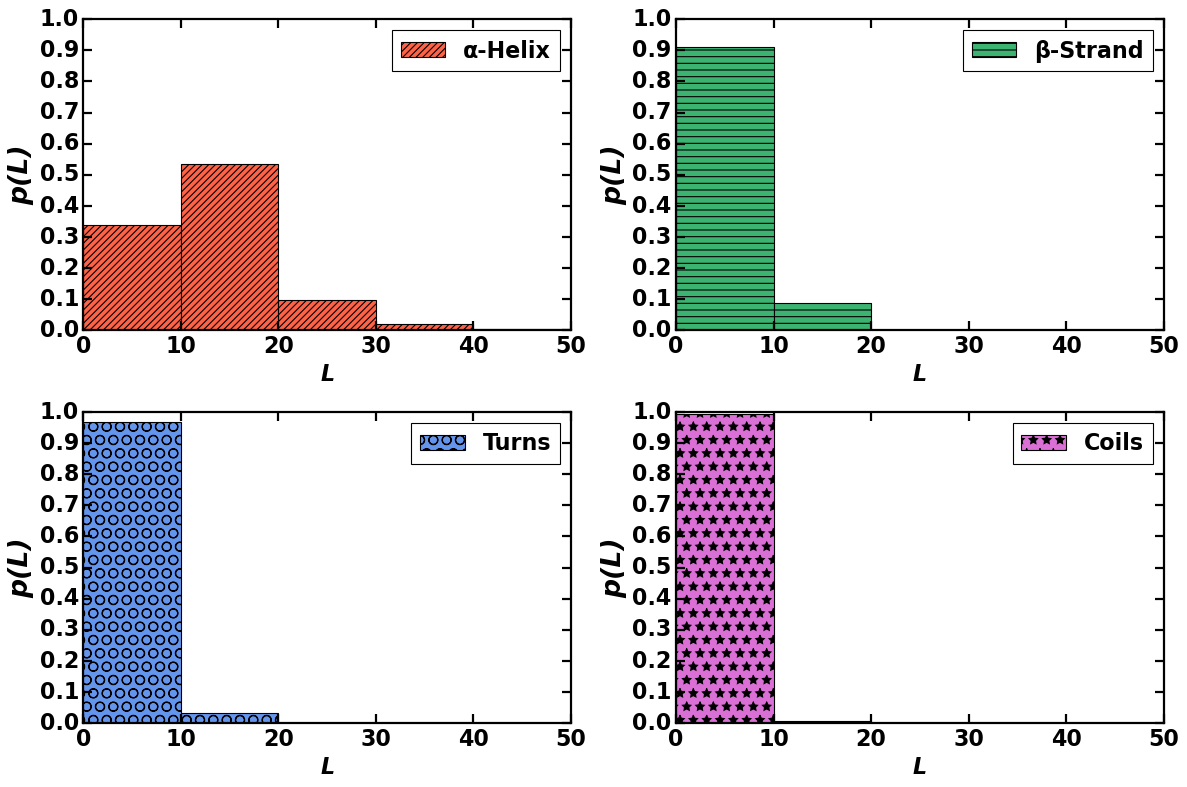

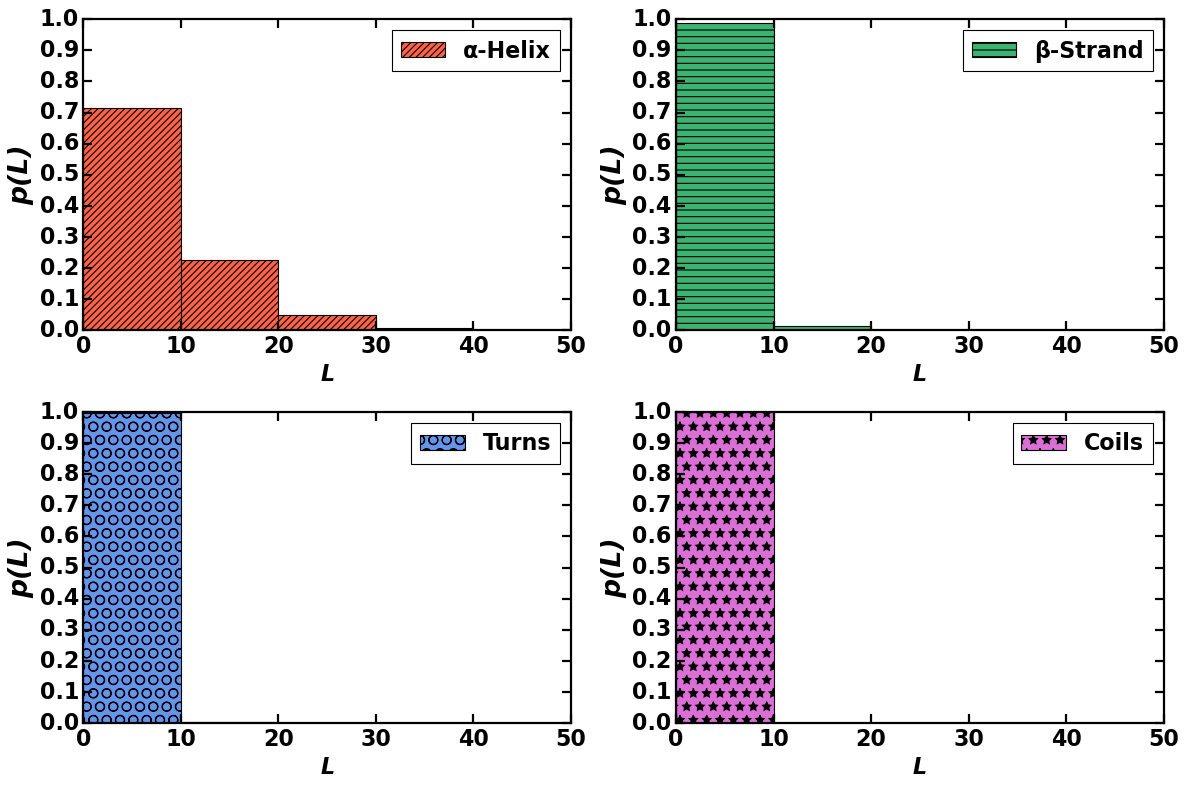

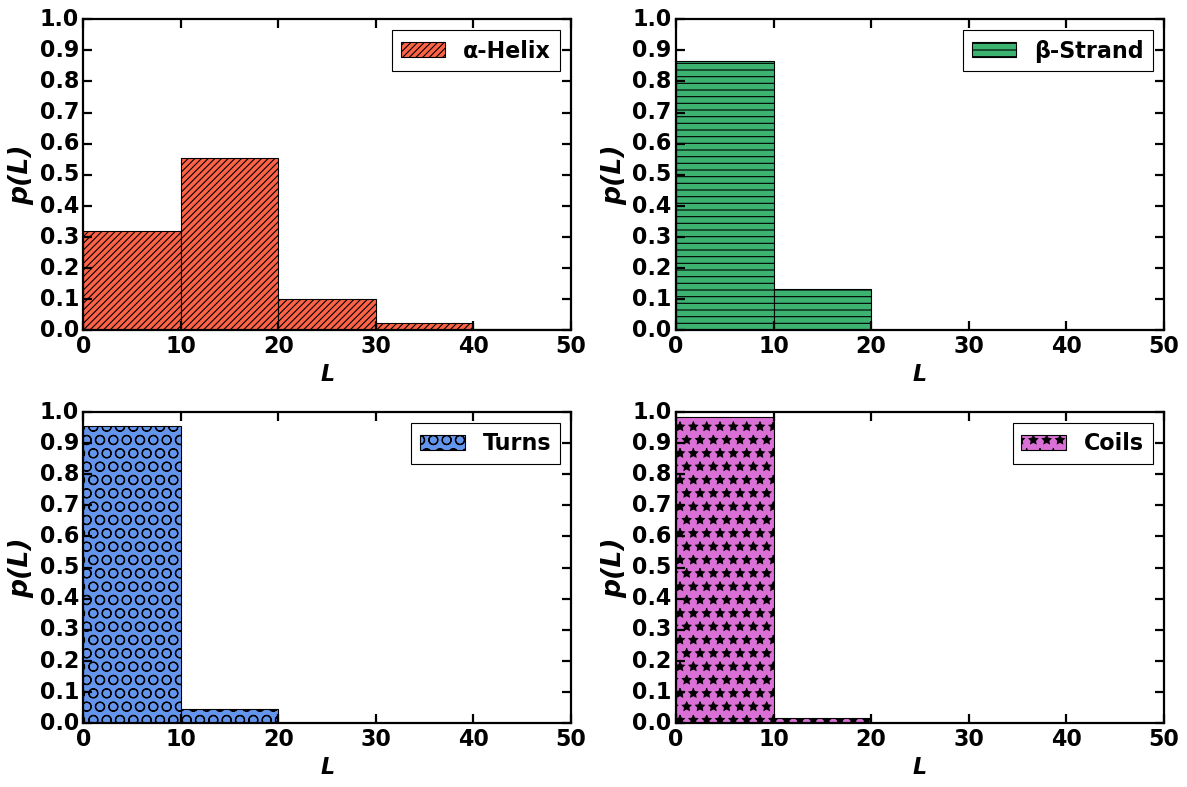

In [5]:
statements=["all","E0","G0"]
for statement in statements:
    ##*****NAMES and SELECTION BELOW
    a=["helix","betasheet", "turns", "coil"]
    ######
    col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
               'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']
    length_dict={}

    for sec_st in a:
        filename="../all_"+sec_st+".csv"
        df=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
        #data= df.loc[(df['Length'] > initial) & (df['Length'] < final)]
        if statement=="E0":
            df=df.loc[df['FrCharged'] == 0]
            #suptitle="Length distribution in Secondary Structures with no Charged residues"
            figure="LengthE0"
        elif statement=="G0":
            df=df.loc[df['FrCharged'] > 0]
            #suptitle="Length distribution in Secondary Structures with atleast one Charged residues"
            figure="LengthG0"
        elif statement=="all":
            df=df
            #suptitle="Length distribution in different Secondary Structures"
            figure="Length-All"
        names=df.loc[:,'Name']
        lengths=df['Length'].tolist()
        length_dict[sec_st]=lengths
    n_bins=np.arange(0,90,10)
    valuesH=length_dict['helix']
    valuesE=length_dict['betasheet']
    valuesT=length_dict['turns']
    valuesC=length_dict['coil']
    histH, bin_edges=np.histogram(valuesH, bins=n_bins, density=False)
    histE, bin_edges=np.histogram(valuesE, bins=n_bins, density=False)
    histT, bin_edges=np.histogram(valuesT, bins=n_bins, density=False)
    histC, bin_edges=np.histogram(valuesC, bins=n_bins, density=False)
    bin_width = bin_edges[2]-bin_edges[1]
    bincenters = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    ##normalised histogram
    norm_histH=histH/len(valuesH)
    norm_histE=histE/len(valuesE)
    norm_histT=histT/len(valuesT)
    norm_histC=histC/len(valuesC)
    ##
    plt.figure(figsize=(15,10),facecolor='white')
    #plt.suptitle(suptitle,fontsize = 20, fontweight='bold')
    plt.subplot(2,2,1)
    plt.bar(np.arange(0,80,10),norm_histH,align="edge", width=10, color="tomato",label="α-Helix",hatch='////')
    plt.xticks(np.arange(0,60,10),fontsize = 20, fontweight="bold")
    plt.yticks(np.arange(0,1.1,0.1),fontsize = 20, fontweight="bold")
    plt.xlabel("L",fontsize = 20, fontweight="bold",style='italic')
    plt.ylabel("p(L)",fontsize = 24, fontweight="bold",style='italic')
    plt.legend(numpoints = 1,prop=dict(weight='bold',size=20),loc='best')
    plt.xlim(0,50)
    plt.subplot(2,2,2)
    plt.bar(np.arange(0,80,10),norm_histE,align="edge", width=10, color="mediumseagreen",label="β-Strand",hatch='--')
    plt.xticks(np.arange(0,60,10),fontsize = 20, fontweight="bold")
    plt.yticks(np.arange(0,1.1,0.1),fontsize = 20, fontweight="bold")
    plt.xlabel("L",fontsize = 20, fontweight="bold",style='italic')
    plt.ylabel("p(L)",fontsize = 24, fontweight="bold",style='italic')
    plt.legend(numpoints = 1,prop=dict(weight='bold',size=20),loc='best')
    plt.xlim(0,50)
    plt.subplot(2,2,3)
    plt.bar(np.arange(0,80,10),norm_histT,align="edge", width=10, color="cornflowerblue",label="Turns",hatch='O')
    plt.xticks(np.arange(0,60,10),fontsize = 20, fontweight="bold")
    plt.yticks(np.arange(0,1.1,0.1),fontsize = 20, fontweight="bold")
    plt.xlabel("L",fontsize = 20, fontweight="bold",style='italic')
    plt.ylabel("p(L)",fontsize = 24, fontweight="bold",style='italic')
    plt.legend(numpoints = 1,prop=dict(weight='bold',size=20),loc='best')
    plt.xlim(0,50)
    plt.subplot(2,2,4)
    plt.bar(np.arange(0,80,10),norm_histC,align="edge", width=10, color="orchid",label="Coils",hatch='*')
    plt.xticks(np.arange(0,60,10),fontsize = 20, fontweight="bold")
    plt.yticks(np.arange(0,1.1,0.1),fontsize = 20, fontweight="bold")
    plt.xlabel("L",fontsize = 20, fontweight="bold",style='italic')
    plt.ylabel("p(L)",fontsize = 24, fontweight="bold",style='italic')
    plt.legend(numpoints = 1,prop=dict(weight='bold',size=20),loc='best')
    plt.xlim(0,50)
    plt.savefig(figure+"normalized.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
plt.show()

/tmp/ipykernel_17591/2435329877.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(["{:.0f}".format(tick) for tick in axes.get_xticks()], fontweight='bold')
/tmp/ipykernel_17591/2435329877.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(["{:.2f}".format(tick) for tick in axes.get_yticks()], fontweight='bold')
/tmp/ipykernel_17591/2435329877.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(["{:.0f}".format(tick) for tick in axes.get_xticks()], fontweight='bold')
/tmp/ipykernel_17591/2435329877.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(["{:.2f}".format(tick) for tick in axes.get_yticks()], fontweight='bold')
/tmp/ipykernel_17591/2435329877.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(["{:.0f}".format(ti

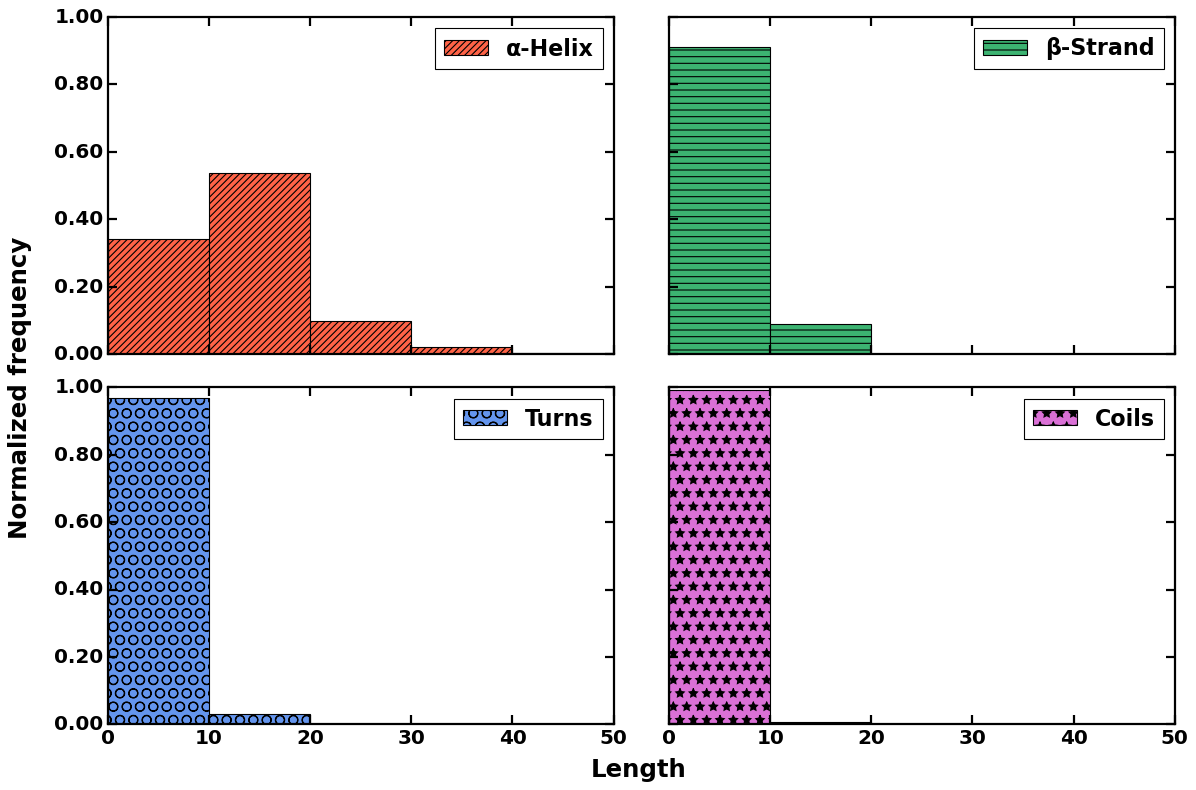

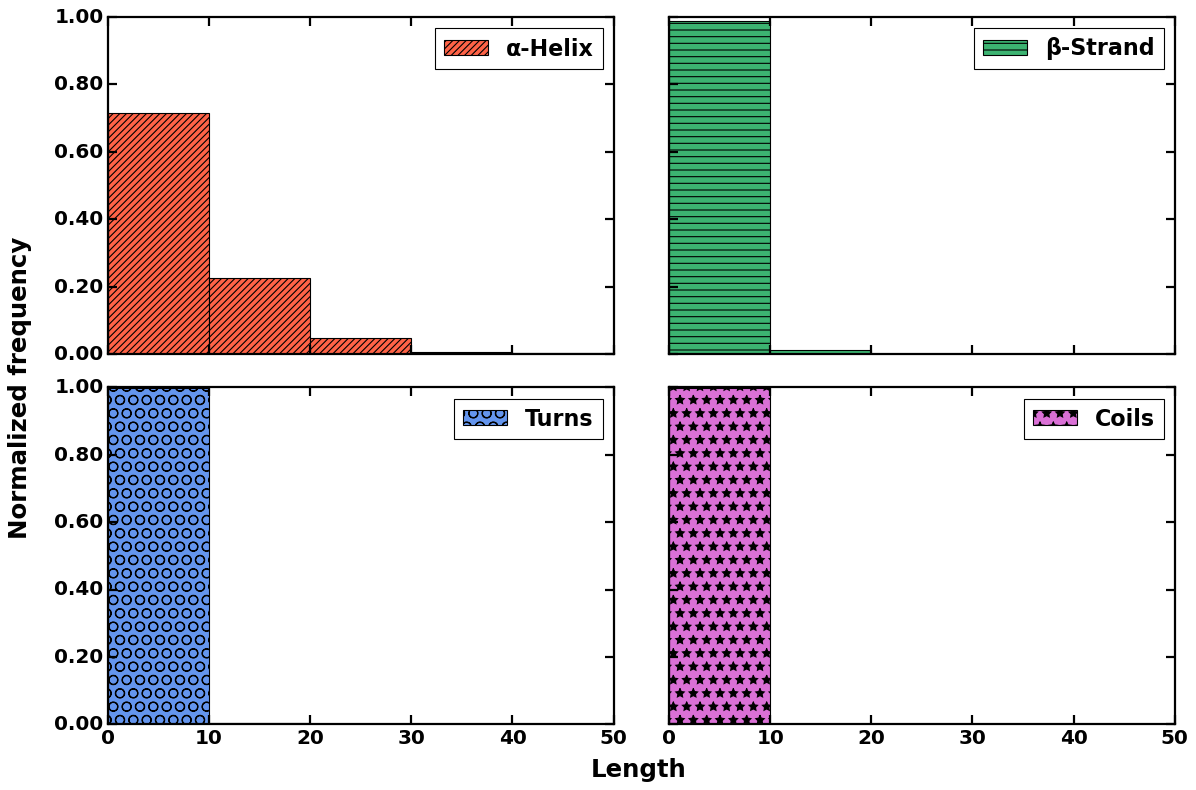

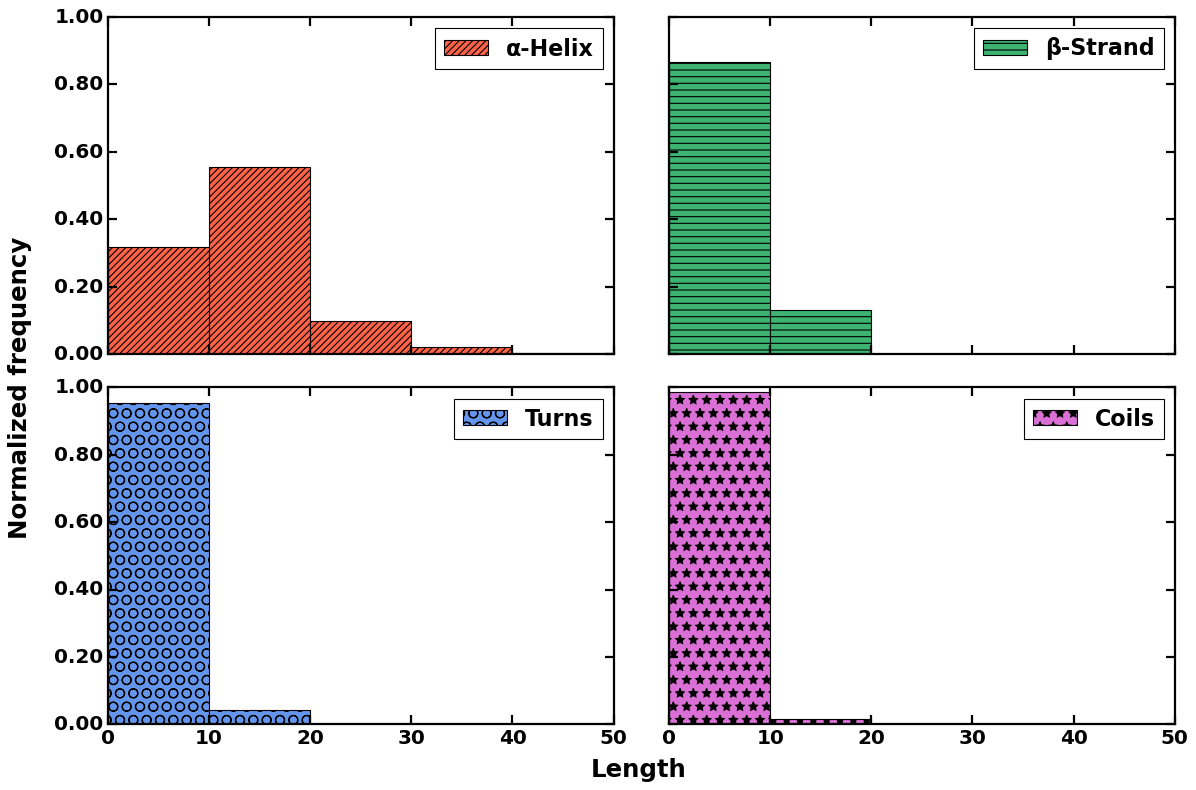

In [3]:
statements=["all","E0","G0"]
for statement in statements:
    ##*****NAMES and SELECTION BELOW
    a=["helix","betasheet", "turns", "coil"]
    ######
    col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
               'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']
    length_dict={}

    for sec_st in a:
        filename="../all_"+sec_st+".csv"
        df=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
        #data= df.loc[(df['Length'] > initial) & (df['Length'] < final)]
        if statement=="E0":
            df=df.loc[df['FrCharged'] == 0]
            #suptitle="Length distribution in Secondary Structures with no Charged residues"
            figure="LengthE0"
        elif statement=="G0":
            df=df.loc[df['FrCharged'] > 0]
            #suptitle="Length distribution in Secondary Structures with atleast one Charged residues"
            figure="LengthG0"
        elif statement=="all":
            df=df
            #suptitle="Length distribution in different Secondary Structures"
            figure="Length-All"
        names=df.loc[:,'Name']
        lengths=df['Length'].tolist()
        length_dict[sec_st]=lengths
    n_bins=np.arange(0,90,10)
    valuesH=length_dict['helix']
    valuesE=length_dict['betasheet']
    valuesT=length_dict['turns']
    valuesC=length_dict['coil']
    histH, bin_edges=np.histogram(valuesH, bins=n_bins, density=False)
    histE, bin_edges=np.histogram(valuesE, bins=n_bins, density=False)
    histT, bin_edges=np.histogram(valuesT, bins=n_bins, density=False)
    histC, bin_edges=np.histogram(valuesC, bins=n_bins, density=False)
    bin_width = bin_edges[2]-bin_edges[1]
    bincenters = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    ##normalised histogram
    norm_histH=histH/len(valuesH)
    norm_histE=histE/len(valuesE)
    norm_histT=histT/len(valuesT)
    norm_histC=histC/len(valuesC)
    ##
    # Your data and plotting code
    fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True, sharex='col',facecolor='white')

    ax[0, 0].bar(np.arange(0, 80, 10), norm_histH, align="edge", width=10, color="tomato", label="α-Helix", hatch='////')
    ax[0, 1].bar(np.arange(0, 80, 10), norm_histE, align="edge", width=10, color="mediumseagreen", label="β-Strand", hatch='--')
    ax[1, 0].bar(np.arange(0, 80, 10), norm_histT, align="edge", width=10, color="cornflowerblue", label="Turns", hatch='O')
    ax[1, 1].bar(np.arange(0, 80, 10), norm_histC, align="edge", width=10, color="orchid", label="Coils", hatch='*')

    # Setting font for xticks and yticks
    for axes_row in ax:
        for axes in axes_row:
            axes.tick_params(axis='x', labelsize=18)  # Set font size for xticks
            axes.tick_params(axis='y', labelsize=18)  # Set font size for yticks

    # Legend font setting
    for axes_row in ax:
        for axes in axes_row:
            axes.legend(numpoints=1, prop=dict(weight='bold', size=20), loc='best')  # Set font size for legend

    # Setting labels for x-axis and y-axis
    ax[1, 1].set_xlabel('Length', fontsize=22, fontweight="bold")  # Set x-label and font size
    ax[1, 0].set_ylabel('Normalized frequency', fontsize=22, fontweight="bold")  # Set y-label and font size

    # Setting x-axis and y-axis limits
    for axes_row in ax:
        for axes in axes_row:
            axes.set_xlim(0, 50)  # Set x-axis limit
            axes.set_ylim(0, 1)   # Set y-axis limit

    # Bold x-labels
    for axes_row in ax:
        for axes in axes_row:
            axes.set_xticklabels(["{:.0f}".format(tick) for tick in axes.get_xticks()], fontweight='bold')

    # Bold y-ticks and format y-tick labels
    for axes_row in ax:
        for axes in axes_row:
            axes.set_yticklabels(["{:.2f}".format(tick) for tick in axes.get_yticks()], fontweight='bold')

    ax[1, 0].yaxis.set_label_coords(-0.15, 1.0)  # Adjust the position of the y-axis label for the third subplot
    ax[1, 1].xaxis.set_label_coords(-0.06, -0.1)
   
    # Reduce padding between subplots
    plt.subplots_adjust(hspace=0.1, wspace=0.10)

    plt.savefig(figure+"normalized.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
plt.show()

In [4]:
pwd

'/data/pc_backup/singh_nitin/viruses/viral_idp_proteins/tuning-disorder-virus-master/data/aa_analysis/organisms_proteins/bacteria/new_results_STRIDE/manuscript_plots'